In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mat
import matplotlib.image as mpimg
import numpy as np

import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import shuffle
import torch
from torch.utils.data import DataLoader 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from IPython.core.display import display, HTML

8000


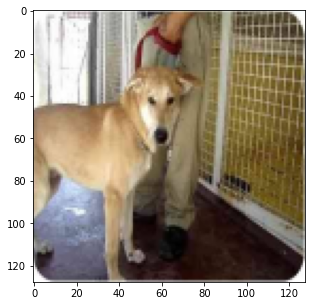

[1]


In [2]:
def show_img(open_cv_image):

    plt.figure(figsize=(5,5))
    plt.imshow(open_cv_image)
    plt.show()
class DatasetForClassify_01:
    def __init__(self,dir_name,flag):
        self.dir_name = dir_name
        self.dir_name_1 = dir_name
        self.flag = flag # 1 - показывать фотографии, 0 - не показывать
        
        
        folder_struct=self.folder2struct(dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
        
    def adddir(self,dir_name ):
        self.dir_name_1 = dir_name
        
    def reinit_0(self  ):
        
        folder_struct=self.folder2struct(self.dir_name_1)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
    def reinit_1(self  ):
        
        folder_struct=self.folder2struct(self.dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']


    def folder2struct(self,dir_name):
        folder = []
        for folder_ in os.listdir( dir_name):
            folder.append(dir_name+folder_+ '/')
        
        indexes=np.array(range(len(folder)))
        ind_all=[]
        w_array=[]
        for i in indexes:
                   
            files_i = self.photo_shuffle(str(folder[i ]))
            ind_all.append(np.array(files_i))
            w_array.append(len(files_i))
        ind_all=np.array(ind_all)
        w_array=np.array(w_array)        
        l_=sum(w_array)
        folder_struct = {'folder':folder,'w_array':w_array,'l_' : l_,'ind_all' : ind_all}
        return folder_struct

        
        
    def __len__(self):
        
         
        return min(10000,self.l_)


    #Создание списка с фото+шаффл
    def photo_shuffle(self,folder_ ):
        files = []
        for file in os.listdir(folder_   + '/'):
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                files.append(file)
        shuffle(files)
        #print(self.folder[number])
        return files
    def downscale_2(self,img):
        img = img.astype(np.uint16)
        img = img[:, 0::2] + img[:, 1::2]
        img = img[0::2, :] + img[1::2, :]
        img >>= 2
        return img.astype(np.float)    
    #Ресайзинг
    def resize(self,pimage):
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
         
        bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB ) 
        if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :
             
            resize_image = self.downscale_2(bw_)
            #resize_image =  bw_ 
        else:
            resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)
         
         
        return resize_image
    
    def random_sample_file(self ):
        i_folder=random.sample(range(len(self.folder)), 1)
        #print('i_folder',i_folder[0])
        i_file=random.sample(range( self.w_array[i_folder[0]]), 1)
        #print('i_file',i_file[0])
        #print('self.folder[i_folder[0]]',self.folder[i_folder[0]])
        file_temp=self.folder[i_folder[0]]+self.ind_all[i_folder[0]][i_file[0]]
        return i_folder,file_temp

    def __getitem__(self,idx):

        i_folder,file_temp=self.random_sample_file()
         
            
        anchor = self.resize(file_temp)
        

        return {'Anchor':anchor/255,
                 
                
               'label': np.array([i_folder[0]])}
###################################################
dataset1 =DatasetForClassify_01('dataset/training_set/',0) 
dataloader = DataLoader(dataset1, batch_size=5)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
show_img(Anchor[:,:,:])
 
label_=batch['label'][0].numpy()  
print(label_)

In [9]:
from zz.gan_struct_04a import *
#from DiffuseMap_03b import *
#№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№
class conv_simple_features_01(Layer_06):
    def __init__(self, canal_init=512, device = None, L1 = 0., L2 = 0.,show=0):
        super(conv_simple_features_01, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
                
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_conv_31 = Conv2d(canal_init,int(canal_init/2), kernel_size=(2, 2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        self.add_module('conv00', _layer_conv_31) 
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_conv_32 = Conv2d(int(canal_init/2),int(canal_init/2), kernel_size=(2,2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        
        self.add_module('conv01', _layer_conv_32) 
        _layer_conv_33 = Conv2d(int(canal_init/2),int(canal_init/4), kernel_size=(2,2),
                            stride=(1, 1), padding = (1, 1), padding_mode = 'zeros', bias = True)
          
        
        self.add_module('conv02', _layer_conv_33) 
        _layer_pooling_1 = MaxPool2d(kernel_size=(2, 2)) #Сжимаем канальность
        self.add_module('Pool_00', _layer_pooling_1) 
        self.add_module('fltn_1', Flatten( )) #Делаем один выходной канал

        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, scatch0):
        im_01_dwnsmpl=self.conv00(scatch0)
        im_01_dwnsmpl=self.activation_LeakyReLU(im_01_dwnsmpl)
        if self.show:
            print('im_01_dwnsmpl',im_01_dwnsmpl.shape)    
         
        im_03_dwnsmpl=self.conv02(im_01_dwnsmpl)
        im_03_dwnsmpl=self.Pool_00(im_03_dwnsmpl) 
        im_03_dwnsmpl=self.activation_LeakyReLU(im_03_dwnsmpl)
        if self.show:
            print('im_03_dwnsmpl',im_03_dwnsmpl.shape)    
        vect_00=self.fltn_1(im_03_dwnsmpl)
        if self.show:
            print('vect_00',vect_00.shape)   
        return vect_00
#№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№
class conv_simple_features_02(Layer_06):
    def __init__(self, canal_init=512, device = None, L1 = 0., L2 = 0.,show=0):
        super(conv_simple_features_02, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
                
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_conv_31 = Conv2d(canal_init,int(canal_init/2), kernel_size=(2, 2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        self.add_module('conv00', _layer_conv_31) 
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_conv_32 = Conv2d(int(canal_init/2),int(canal_init/2), kernel_size=(2,2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        
        self.add_module('conv01', _layer_conv_32) 
        _layer_conv_33 = Conv2d(int(canal_init/2),int(canal_init/4), kernel_size=(2,2),
                            stride=(1, 1), padding = (1, 1), padding_mode = 'zeros', bias = True)
          
        
        self.add_module('conv02', _layer_conv_33) 
        _layer_pooling_1 = MaxPool2d(kernel_size=(2, 2))  
        self.add_module('Pool_00', _layer_pooling_1) 
        self.add_module('fltn_1', Flatten( ))

        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, scatch0):
        im_01_dwnsmpl=self.conv00(scatch0)
        im_01_dwnsmpl=self.activation_LeakyReLU(im_01_dwnsmpl)
        if self.show:
            print('im_01_dwnsmpl',im_01_dwnsmpl.shape)    
        im_02_dwnsmpl=self.conv01(im_01_dwnsmpl)
        im_02_dwnsmpl=self.activation_LeakyReLU(im_02_dwnsmpl)
        if self.show:
            print('im_02_dwnsmpl',im_02_dwnsmpl.shape)    
        im_03_dwnsmpl=self.conv02(im_02_dwnsmpl)
        im_03_dwnsmpl=self.Pool_00(im_03_dwnsmpl) 
        im_03_dwnsmpl=self.activation_LeakyReLU(im_03_dwnsmpl)
        if self.show:
            print('im_03_dwnsmpl',im_03_dwnsmpl.shape)    
        vect_00=self.fltn_1(im_03_dwnsmpl)
        if self.show:
            print('vect_00',vect_00.shape)   
        return vect_00
################################################
################################################3
class fully_connect_modul_300(Layer_06):
    def __init__(self,  size_,device = None, L1 = 0., L2 = 0.,   show=0):
        super(fully_connect_modul_300, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
             
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(size_[0], size_[1], bias = True)
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5)
        _layer_batch_norm_3 = BatchNorm1d(size_[1])
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(size_[1], size_[2], bias = True)
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(size_[2], size_[3], bias = True)
        self.add_module('D03', _layer_D03)
       
        
        
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
        #########################
        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, vect_00):
        vect_01=self.D01(vect_00)        
        vect_01=self.Dropout01(vect_01)
        vect_01=self.activation_LeakyReLU(vect_01)
        if self.show:
            print('vect_01',vect_01.shape) 
        vect_01=self.layer_batch_norm(vect_01)
        if self.show:
            print('vect_01 layer_batch_norm',vect_01.shape) 
        vect_02=self.D02(vect_01) 
        vect_02=self.activation_LeakyReLU(vect_02)
        if self.show:
            print('vect_02',vect_02.shape)    
        vect_03=self.D03(vect_02) 
        
         
        if self.show:
            print('vect_03',vect_03.shape)         
        return vect_03

################################################3
class Normalization(nn.Module):
    def __init__(self,  device):
        super(Normalization, self).__init__()
        self.device =device
        cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]) 
        cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]) 
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.FloatTensor(cnn_normalization_mean).view(-1, 1, 1).to(self.device)
        #self.mean = torch.tensor(mean)
        #print(self.mean)
        #self.std = torch.tensor(std).view(-1, 1, 1) 
        self.std = torch.FloatTensor(cnn_normalization_std).view(-1, 1, 1).to(self.device)
        #print(self.std)
 
    def forward(self, img):
        #Получает на вход фотографию. На выходе такой же формат+размер, но другие данные. Также увеличивает канальность с 1 до 3
        return ((img - self.mean) / self.std).to(self.device)
###########################################################################################3
class TL_003_mehanit_onnx(Layer_06):
    def __init__(self, imageSize,  last_activate, L1 = 0., L2 = 0.,device = None,numclasses=10,show=0 ):
        super(TL_003_mehanit_onnx, self).__init__( (imageSize[0],imageSize[1],1)   )    

        #self.class_name = str(self.__class__).split(".")[-1].split("'")[0]
        self.class_name = self.__class__.__name__
        self.last_activate = last_activate
        self.cannal_in= imageSize[2]
         
        self.imageSize = imageSize
        self.regularizer = Regularizer(L1, L2)
        self.show=show
        self.L1=L1
        self.L2=L2
        self.numclasses=numclasses 
        self.criterion_tml = torch.nn.TripletMarginLoss(margin=1.0, p=2)
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")

        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        ##############
        self._layer_permut_channelfirst = Lambda(lambda x:  x.permute((0, 3, 1, 2)))
        self._layer_permut_channellast = Lambda(lambda x:  x.permute((0, 2, 3, 1)))
        self.vgg_normalization = Normalization( self.device) #Первое делаем нормализиацию.
        vgg_conv = torchvision.models.vgg19(pretrained=0)##конв часть+ векторизация
        vgg_conv.load_state_dict(torch.load('weights/vgg19-dcbb9e9d.pth', map_location=self.device))
        self.vgg_conv= vgg_conv.features.to(self.device)# только  конв часть
        for param in self.vgg_conv.parameters():
            param.requires_grad = False
        self.conv2Dfeatures_00=conv_simple_features_01(512,device,L1 ,L2,self.show) 
        self.conv2Dfeatures_01=conv_simple_features_02(512,device,L1 ,L2,self.show) 
        self.conv2Dfeatures_02=conv_simple_features_02(256,device,L1 ,L2,self.show) 
        self.conv2Dfeatures_03=conv_simple_features_02(512,device,L1 ,L2,self.show) 
        self.fully_connect_modul_00=fully_connect_modul_300([512,128,64,32],device,L1 ,L2,self.show)
        self.fully_connect_modul_01=fully_connect_modul_300([384,128,64,32],device,L1 ,L2,self.show)
        self.fully_connect_modul_02=fully_connect_modul_300([192,100,32,1],device,L1 ,L2,self.show)
        
        ###################
         
        
        _layer_SfTMax = Softmax(dim = -1)
        self.add_module('SfTMax', _layer_SfTMax)  
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
 
        self.to(self.device)
        
        self.reset_parameters()
    #####################################################
    def forward(self, scatch ):
        class _type_input(Enum):
            is_torch_tensor = 0
            is_numpy = 1
            is_list = 2
        
           
        x_input = scatch
        
        _t_input = []
        _x_input = []
        for x in (x_input,x_input):
            if isinstance(x, (torch.Tensor)):
                _t_input.append(_type_input.is_torch_tensor)
                _x_input.append(x)
            elif isinstance(x, (np.ndarray)):
                _t_input.append(_type_input.is_numpy)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            elif isinstance(x, (list, tuple)):
                _t_input.append(_type_input.is_list)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            else:
                raise Exception('Invalid type input')

        _x_input = tuple(_x_input)
        _t_input = tuple(_t_input)
        #print('_x_input[0]',_x_input[0])
        
        #ПредПроцессинг
        scatch = self._contiguous(_x_input[0]) #Меняет формат тензора. Функция contiguous. Формат данных тот же. Бесползеная строка
        #scatch = _x_input[0].contiguous()
        dec_0=self.predprocessing(scatch) #Предпроцессинг взятый из ВГГ. Меняет канальность и делает нормализацию фотографии
        #Также в нормализации увеличивается канальность с 1 до 3.
        if self.show:
            print('dec_0=self.predprocessing(scatch)',dec_0.shape)
        
        ##### STYLE  ###################################### ТЕКСТУРА
        #Сначала делаем ВГГ конлюцию, получаем словарь с разными слоями. Далее работаем с каждым слоем из ВГГ
        dec_1=self.get_features(dec_0) #конволюциооный слой из ВГГ. На выходе имеем словарь с каждым описанным слоем.
        #########################
        d_0=dec_1['conv5_1'] #Забираем только последний слой
        if self.show:
            print('d_0=dec_1[conv5_1]',d_0.shape)
        d_01=self.conv2Dfeatures_00(d_0) #Конволюционный слой от Михаила. Конв-релу-Конв-релу-Флаттен. На выход [2,512]
        if self.show:
            print('d_01=self.conv2Dfeatures_00(d_0)',d_01.shape)
        d_02=self.fully_connect_modul_00(d_01) #Полносвязное линейное преобразование, уменьашем канальность с 512-32 [2,32]
        if self.show:
            print('d_02=self.fully_connect_modul_00(d_01)',d_02.shape)
        ##############
        #Берем предпоследний слой из словаря. Делаем конвалюции.
        d_1=dec_1['conv4_1']
        if self.show:
            print('d_1=dec_1[conv4_1]',d_1.shape)
        d_11=self.conv2Dfeatures_01(d_1)
        if self.show:
            print('d_11=self.conv2Dfeatures_01(d_0)',d_11.shape)
        #На выходе Тензор [2,128]
        #№№№№№№№№№№№№№№№№№№    
        #Берем 3 слой из словаря. Делаем конвалюции.
        d_2=dec_1['conv3_1']
        if self.show:
            print('d_2=dec_1[conv4_1]',d_2.shape)
        d_21=self.conv2Dfeatures_02(d_2)
        if self.show:
            print('d_21=self.conv2Dfeatures_01(d_0)',d_21.shape)
        #На выходе Тензор [2,256]
        #№№№№№№№№№№№№№№№№№№ 
        d_30=torch.cat((d_11 ,d_21   ),axis=1)
        #Торч.Кет для объединения двух тензоров вокруг одной оси. Получаем тензор [2,384]
        if self.show:
            print('d_30=torch.cat((d_11 ,d_21   ),axis=1)',d_30.shape)
        d_31=self.fully_connect_modul_01(d_30) #И сделали полносвязное линейное преобзование
        if self.show:
            print('d_31=self.fully_connect_modul_01(d_30)',d_31.shape)
        #На выходе Тензор [2,32]
        #########################
        #Тут мы складываем тензор из первой части и тензор из 2 и 3 части. ВЫХОДНАЯ ТЕКСТУРА
        d_40_style_vector=torch.cat((d_02 ,d_31  ),axis=1)
        if self.show:
            print('d_40_style_vector',d_40_style_vector.shape)
        #На выходе Тензор [2,64]
        ##### content  ###################################### Михаил сказал КОНТЕНТ
        #Опять берем предпоследний слой из словаря
        d_5=dec_1['conv4_2']
        if self.show:
            print('d_5=dec_1[conv4_2]',d_5.shape)
        d_51_structure_vector=self.conv2Dfeatures_03(d_5)
        if self.show:
            print('d_51_structure_vector',d_51_structure_vector.shape)  
        #Делаем с ним конволюции и получаем на выходе [2, 128].
        ##########  final  ################################3
        #Складываем вектора КОНТЕНТА и ТЕКСТУРЫ
        d_52=torch.cat((d_40_style_vector ,d_51_structure_vector  ),axis=1)
        if self.show:
            print('d_52',d_52.shape) 
        d_53=self.fully_connect_modul_02(d_52) #Делаем полносвязный линейный модуль
        d_54=self.Sgmd(d_53) #И с помощью сигмоиды выбор
        if self.show:
            print('d_54',d_54.shape) 
            
            
 
        x = d_54
        x = self._contiguous(x)

        ###################    

        if _type_input.is_torch_tensor in _t_input:
            pass
        elif _type_input.is_numpy in _t_input:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy()
            else:
                x = x.detach().numpy()
        else:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy().tolist()
            else:
                x = x.detach().numpy().tolist()

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return x 
    
    #Вся часть связанная с ВГГ для получения на выходе словаря со слоями
    def _get_regularizer(self):
        return self.regularizer
#################################################################
    def predprocessing(self, x ):
        x_1=self._layer_permut_channelfirst(x)
        x_2=self.vgg_normalization(x_1)
        return x_2
    def apply_vgg_to_1_tevsor(self, x_input ):
        x_1=self.predprocessing(x_input)
        x_2=self.vgg_conv(x_1)
        return x_2
    def get_features(self,image,   layers=None):
        """ Run an image forward through a model and get the features for 
            a set of layers. Default layers are for VGGNet matching Gatys et al (2016)
        """
        model=self.vgg_conv
        ## TODO: Complete mapping layer names of PyTorch's VGGNet to names from the paper
        ## Need the layers for the content and style representations of an image
        if layers is None:
            layers = {'0': 'conv1_1',
                      '5': 'conv2_1', 
                      '10': 'conv3_1', #Текстуры
                      '19': 'conv4_1', #Текстуры
                      '21': 'conv4_2', ## content representation
                      '28': 'conv5_1'} #Текстуры


        ## -- do not need to change the code below this line -- ##
        features = {}
        x = image
        # model._modules is a dictionary holding each module in the model
        for name, layer in model._modules.items():
            #print( name)
            #print(isinstance(x, (torch.Tensor)))
            
            x = layer(x)
            if name in layers:
                features[layers[name]] = x

        return features

###################################################################################################
      
    def _get_regularizer(self):
        return self.regularizer

###################################################################
    def loss_batch_01(self,dsrmn_model, xb, yb,   opt=None):
#            def cross_entropy(pred, soft_targets):
#                return -torch.log(torch.mean(torch.sum(soft_targets * pred, 1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
#            def l2_norm_diff(pred, soft_targets):
#                return  torch.sqrt(torch.mean(torch.sum((soft_targets - pred )**2,-1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))

        #print(xb[0].shape)
        
        pred = self.forward(xb)
          

        if isinstance(pred, tuple):
            pred0 = pred[0]
            del pred
        else:
            pred0 = pred
        loss=0
        
        #loss_mse= self._criterion(pred0, yb) 
        #print(pred0.shape)
        #print(yb.shape)
        MSELoss=nn.MSELoss(reduction='mean') 
        #print(pred0.shape,  yb.shape)
        loss_mse= MSELoss(pred0, yb) 
         
        
        loss +=1.1*loss_mse 
       
        #print(self.loss_vgg_1_bw(pred0, yb),self._criterion(pred0, yb),self.MSELoss( dscrm_tenzor,0*dscrm_tenzor))
         
        
        #loss+=  2.1*loss_mse 
        #loss = loss_func(pred0, yb)
        #loss = cross_entropy(pred, yb)

        del pred0

        #_, predicted = torch.max(pred.data, dim = 1)
        #_, ind_target = torch.max(yb, dim = 1)
        #correct = (predicted == ind_target).sum().item()
        #acc = correct / len(yb) #.size(0)

        _regularizer = self._get_regularizer()

        reg_loss = 0
        for param in self.parameters():
            reg_loss += _regularizer(param)

        loss += reg_loss

        if (opt is not None)  :
            with torch.no_grad():

                opt.zero_grad()

                loss.backward()

                opt.step()

        self.count+=1
        if self.count  %3==0:
            print("*", end='')

        loss_item = loss.item()

        del loss
        del reg_loss

        return loss_item, len(yb)#, acc

    
################################################################
    def fit_dataloader_00(self, dscrm_model,loader,   epochs = 1, validation_loader = None):
        #_criterion = nn.CrossEntropyLoss(reduction='mean')
        #_optimizer = optim.AdamW(self.parameters())
        #_optimizer = optim.Adam(self.parameters(), lr = 0.00001)#, eps=0.0)
        if (self._criterion is None): # or not isinstance(self._criterion, nn._Loss):
            raise Exception("Loss-function is not select!")

        if (self._optimizer is None) or not isinstance(self._optimizer, optim.Optimizer):
            raise Exception("Optimizer is not select!")

#        _criterion = nn.MSELoss(reduction='mean')
#        _optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.2)


         
            
            
        history = History()
        self.count=0
        for epoch in range(epochs):
            self._optimizer.zero_grad()
            
            print("Epoch {0}/{1}".format(epoch, epochs), end='')
            
            self.train()
            ########################################3
             
            
            ### train mode ###
            print("[", end='')
            losses=[]
            nums=[]
            for s in loader:
                
 
                
                train_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['label'].numpy()).to(self.device)  
                                        )
                
                 
                 
                images_Anchor=train_ds.tensors[0] 
                 
                label_=train_ds.tensors[1]
                 
                
                
                

                losses_, nums_   =   self.loss_batch_01(dscrm_model, \
                                                   images_Anchor,\
                                                    label_,  self._optimizer)                                                                                                       


                losses.append(losses_)
                nums.append(nums_ )
                 
                
            print("]", end='')


            sum_nums = np.sum(nums)
            loss = np.sum(np.multiply(losses, nums)) / sum_nums
            ######################################
             
            ### test mode ###
            if validation_loader is not None:
                 


                self.eval()
                
                 
                print("[", end='')
                losses=[]
                nums=[]
                for s in validation_loader:
                #s = next(iter(loader))
                
                    val_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['class_'].numpy()).to(self.device)  
 
                                        )
                

                    images_Anchor=val_ds.tensors[0] 

                    class_=val_ds.tensors[1]
                     
                
                 
                
                     
                
                

  
                      
                    
                                                                                                                         

                    losses_, nums_   =  \
                    self.loss_batch_01( dscrm_model,\
                           (images_Anchor ,images_Anchor ),\
                           class_, self._optimizer)      

                    losses.append(losses_)
                    nums.append(nums_ )
                print("]", end='')


                sum_nums = np.sum(nums)
                val_loss = np.sum(np.multiply(losses, nums)) / sum_nums
                    #acc = np.sum(np.multiply(accs, nums)) / sum_nums
                #################################################
                history.add_epoch_values(epoch, {'loss': loss, 'val_loss': val_loss})
                
                print(' - Loss: {:.6f}'.format(loss), end='')
                print(' - Test-loss: {:.6f}'.format(val_loss), end='')
            else:
                history.add_epoch_values(epoch, {'loss': loss })
                print(' - Loss: {:.6f}'.format(loss), end='')
                
            print("")
            
 
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return history
    
    
    
    
#from DiffuseMap_03b import *
IMAGE_SIZE = [128, 128, 3] 
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cpu',numclasses=670 ,show=0)
TL_001.compile(criterion='000', optimizer='adam', lr=0.0001, momentum=0.5) 
#TL_001.load_state('TL_01.pt')
TL_001.load_state('weights/cat_dogs_VGG.pt')      
TL_001.eval()
TL_001.summary() 


Loading preset weights... Ok.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Lambda-1          [-1, 1, 128, 128]               0
     Normalization-2          [-1, 3, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]           1,792
              ReLU-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          36,928
              ReLU-6         [-1, 64, 128, 128]               0
         MaxPool2d-7           [-1, 64, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]          73,856
              ReLU-9          [-1, 128, 64, 64]               0
           Conv2d-10          [-1, 128, 64, 64]         147,584
             ReLU-11          [-1, 128, 64, 64]               0
        MaxPool2d-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]         295,168
        

In [10]:
from onnx1 import *
dummy_input = torch.randn(1, 128, 128,1, requires_grad=True)
create_onnx(TL_001,dummy_input,"TL_001.onnx")

# Обучение

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008909
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

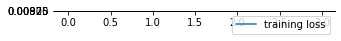

loss:   0.008634346035630396
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009183
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

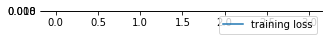

loss:   0.007925675807782284
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008193
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

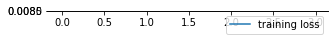

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007993
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

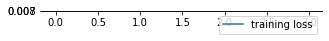

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007333
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

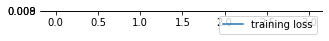

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009102
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

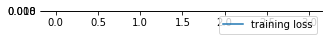

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008410
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

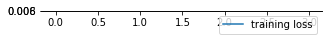

loss:   0.005796462626288844
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007741
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

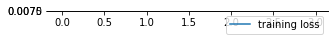

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008095
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

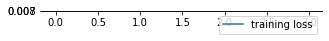

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007080
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

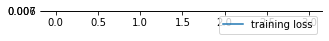

loss:   0.005765797362716605
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008133
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

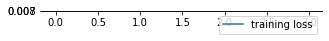

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006923
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

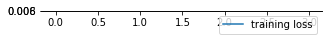

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008184
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

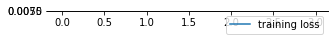

loss:   0.004540763247527908
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007220
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

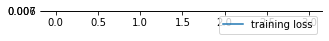

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005910
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

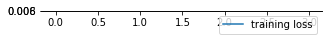

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006317
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

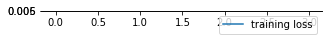

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006161
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

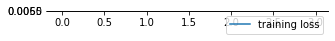

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005210
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

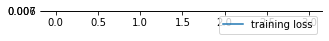

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006575
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

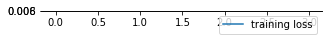

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005799
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

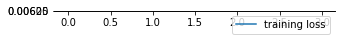

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006469
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

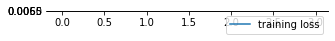

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005878
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

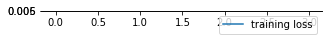

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004554
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

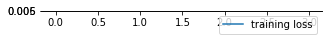

loss:   0.004528111234498396
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005147
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

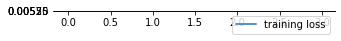

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004435
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

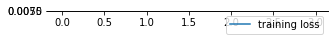

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006333
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

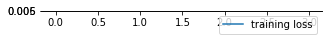

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004725
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

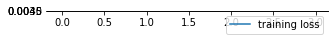

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004295
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

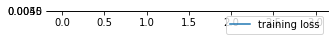

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005239
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

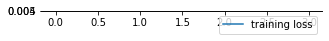

loss:   0.004328892827275732
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005614
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

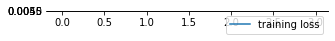

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004443
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

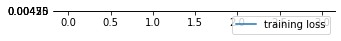

loss:   0.004249722646893787
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003662
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

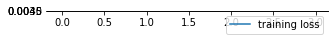

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003292
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

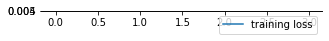

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003377
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

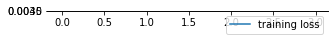

loss:   0.003791627545854055
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003618
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

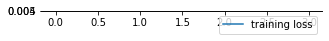

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004328
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

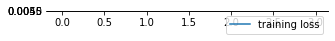

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005158
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

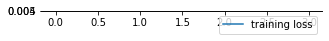

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004894
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

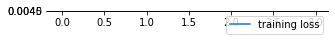

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005018
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

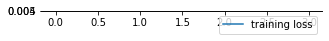

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003963
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

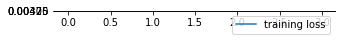

loss:   0.0036877419806300685
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003470
Epoch 1/4[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

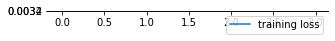

loss:   0.0030377104029144127
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004486
Epoch 1/4[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

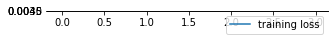

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002793
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

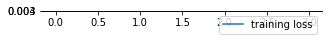

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004559
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

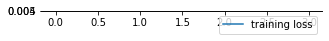

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003573
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

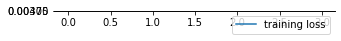

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004316
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

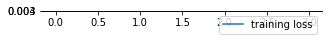

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004402
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

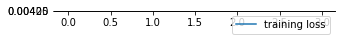

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003241
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

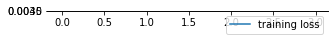

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002678
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

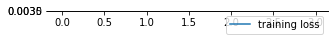

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004423
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

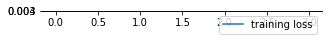

loss:   0.0028502417176124828
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002590
Epoch 1/4[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

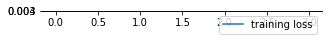

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002392
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

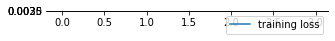

loss:   0.002821066329646168
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003297
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

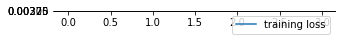

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003286
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

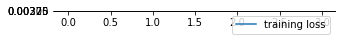

loss:   0.002595033653378054
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003593
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

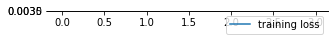

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003893
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

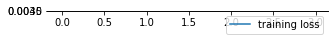

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003875
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

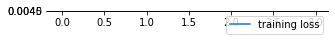

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003915
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

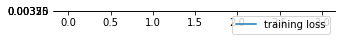

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003420
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

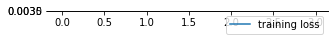

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003539
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

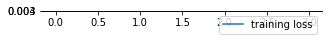

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002457
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

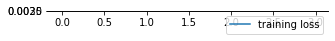

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003743
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

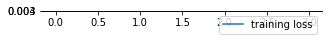

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002446
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

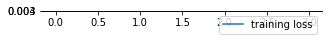

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003413
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

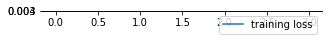

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004618
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

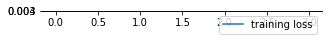

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004241
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

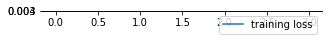

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002348
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

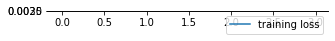

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002630
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

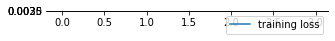

loss:   0.002358437666962935
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002539
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

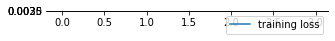

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003352
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

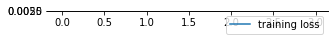

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003739
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

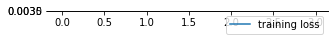

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003029
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

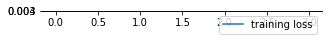

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002684
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

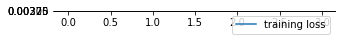

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003303
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

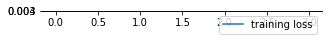

loss:   0.002285296263332056
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002993
Epoch 1/4[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

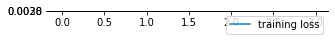

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003606
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

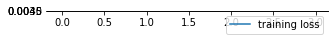

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003050
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

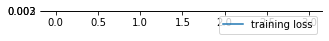

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003221
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

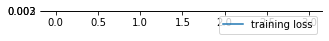

loss:   0.0019444319409756665
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003929
Epoch 1/4[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

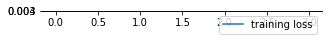

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003874
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

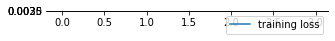

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002881
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

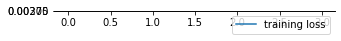

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003365
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

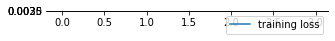

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003394
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

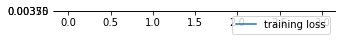

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003355
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

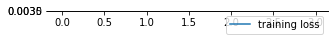

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002942
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

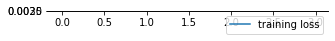

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003229
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

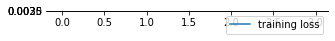

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003922
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

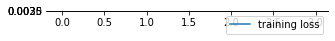

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003351
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

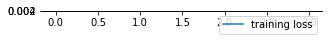

loss:   0.0015844327939137706
Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002535
Epoch 1/4[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

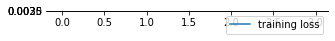

Epoch 0/4[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.002543
Epoch 1/4[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

KeyboardInterrupt: 

In [12]:
min_loss=10


dataset1 =DatasetForClassify_01('dataset/training_set/',0) 
dataloader = DataLoader(dataset1, batch_size=5)        


for gn in range(1000):
    H =TL_001.fit_dataloader_00(  \
                None,loader=dataloader,   epochs = 4, validation_loader = None)
    plt.figure(figsize=(5,5))
    plt.axes().set_aspect('equal')
    plt.plot(H.history['loss'], label='training loss')
    #plt.plot(H.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()
    loss_=H.history['loss'][-1]
    if loss_<min_loss:
        TL_001.save_state('weights/cat_dogs_VGG.pt')
           
         
        print("loss:  ",loss_)
        min_loss=loss_
    dataset1 =DatasetForClassify_01('dataset/training_set/',0) 
    dataloader = DataLoader(dataset1, batch_size=5)        
     
     

# Save in ONXX

In [12]:
def resize_(pimage):
    stream = open(pimage, "rb")
    bytes = bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
    stream.close()

    bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB ) 
    resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)


    return resize_image/255

im = np.expand_dims(resize_('dataset/test_set/cats/cat.4002.jpg'),0)
im.shape

(1, 128, 128, 3)

In [13]:
TL_001.eval()
TL_001.forward(im)

array([[0.49654928]], dtype=float32)

In [14]:
dummy_input = torch.randn(1, 128, 128,3, requires_grad=True)
dummy_input.shape

torch.Size([1, 128, 128, 3])

In [15]:
from onnx1 import *
#На вход подаем нашу модель. Тензор с нужным сайзингом. И как назовем onnx модель
create_onnx(TL_001,dummy_input,"VGG.onnx")

In [16]:
load_onnx("VGG.onnx",'dataset/test_set/cats/cat.4002.jpg')

array([[0.49654925]], dtype=float32)